<a href="https://colab.research.google.com/github/Leegyu66/-/blob/main/07_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input/255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
def model_fn(a_layer=None): # 모델 생성 함수
  model = keras.Sequential() 
  model.add(keras.layers.Flatten(input_shape=(28, 28))) # flatten 층 생성
  model.add(keras.layers.Dense(100, activation='relu'))
  if a_layer: # a_layer 매개변수에 값을 전달하면 은닉층 뒤에 하나를 더 추가한다다
    model.add(a_layer)
  model.add(keras.layers.Dense(10, activation='softmax'))
  return model

In [4]:
model = model_fn()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy') # 모델 컴파일
history = model.fit(train_scaled, train_target, epochs=5, verbose=1) # verbose=0 은 훈련과정 없앰앰, 1이면 추가 2이면 막대만 빼고

Epoch 1/5
1500/1500 [==============================] - 8s 2ms/step - loss: 0.5269 - accuracy: 0.8155
Epoch 2/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3894 - accuracy: 0.8604
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3545 - accuracy: 0.8725
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3335 - accuracy: 0.8803
Epoch 5/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3152 - accuracy: 0.8863


In [6]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


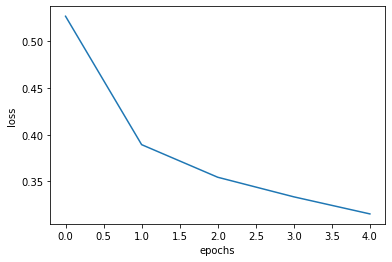

In [7]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

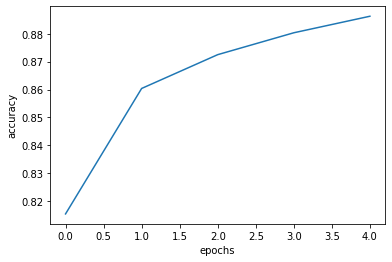

In [8]:
plt.plot(history.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

Epoch 1/20
1500/1500 - 5s - loss: 0.5317 - accuracy: 0.8127 - 5s/epoch - 3ms/step
Epoch 2/20
1500/1500 - 3s - loss: 0.3932 - accuracy: 0.8586 - 3s/epoch - 2ms/step
Epoch 3/20
1500/1500 - 3s - loss: 0.3554 - accuracy: 0.8719 - 3s/epoch - 2ms/step
Epoch 4/20
1500/1500 - 3s - loss: 0.3331 - accuracy: 0.8801 - 3s/epoch - 2ms/step
Epoch 5/20
1500/1500 - 3s - loss: 0.3183 - accuracy: 0.8847 - 3s/epoch - 2ms/step
Epoch 6/20
1500/1500 - 3s - loss: 0.3048 - accuracy: 0.8894 - 3s/epoch - 2ms/step
Epoch 7/20
1500/1500 - 3s - loss: 0.2957 - accuracy: 0.8948 - 3s/epoch - 2ms/step
Epoch 8/20
1500/1500 - 3s - loss: 0.2842 - accuracy: 0.8991 - 3s/epoch - 2ms/step
Epoch 9/20
1500/1500 - 3s - loss: 0.2801 - accuracy: 0.9014 - 3s/epoch - 2ms/step
Epoch 10/20
1500/1500 - 3s - loss: 0.2735 - accuracy: 0.9031 - 3s/epoch - 2ms/step
Epoch 11/20
1500/1500 - 3s - loss: 0.2658 - accuracy: 0.9067 - 3s/epoch - 2ms/step
Epoch 12/20
1500/1500 - 3s - loss: 0.2595 - accuracy: 0.9085 - 3s/epoch - 2ms/step
Epoch 13/20
1

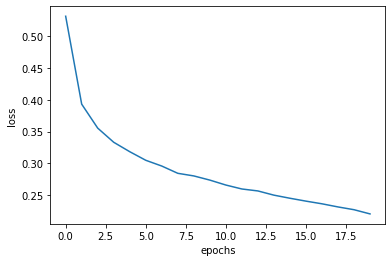

In [9]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=2)
plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

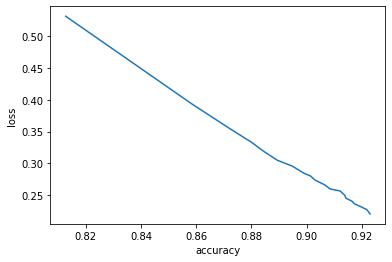

In [10]:
plt.plot(history.history['accuracy'], history.history['loss'])
plt.xlabel('accuracy')
plt.ylabel('loss')
plt.show()

In [11]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target)) # validation_data에 검증에 사용할 데이터를 넣음

In [12]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


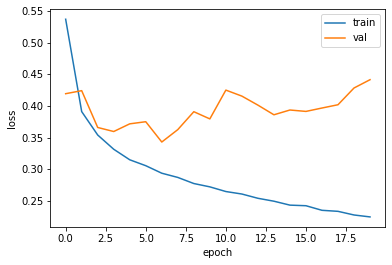

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])

## optimizer
- 과대적합을 완화시키기 위한 옵티마이저 하이퍼파라미터를 조정
- RMSprop 옵티마이저는 많은 곳에서 잘 작동
- 하지만 Adam을 사용할 거임임

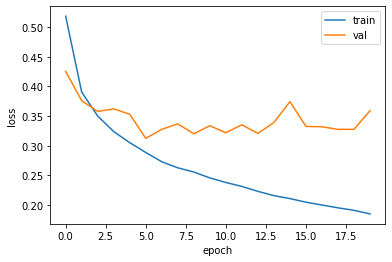

In [13]:
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy') # RMSprop 보단 adam이 더 잘맞는듯 하다 과대적합이 더 완화되어있음
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## 드롭아웃(Dropout)
- 딥러닝의 아버지로 불리는 제프리 힌턴(Geoffrey Hinton)이 소개함
- 일부 뉴런을 랜덤하게 끈다
- 과대적합을 줄일 수 있음
- 이전 층의 일부 뉴런이 랜덤하게 꺼지면 특정 뉴런에 과대하게 의존하는 것을 줄일 수 있다

In [14]:
model = model_fn(keras.layers.Dropout(0.3)) # 30% 정도를 드롭아웃함함
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

KeyboardInterrupt: ignored

In [18]:
def model_dropout_setting(dropout_percent):
  model = model_fn(keras.layers.Dropout(dropout_percent))

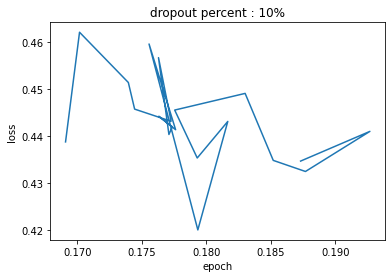

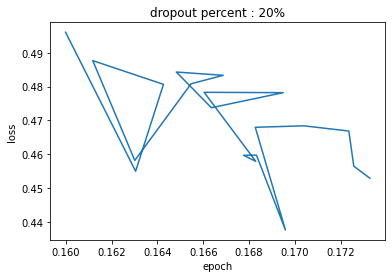

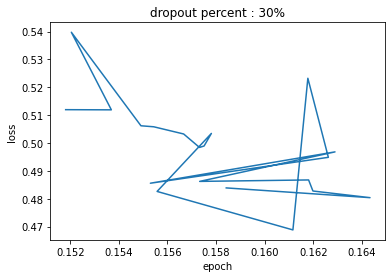

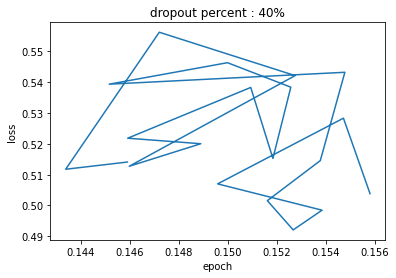

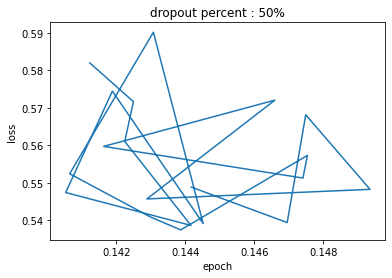

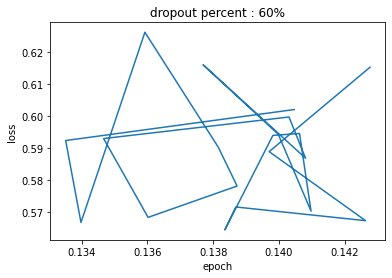

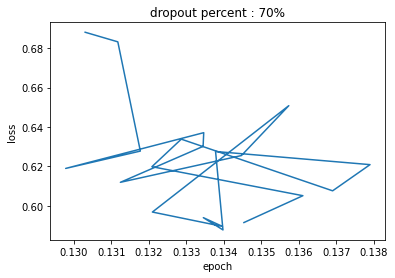

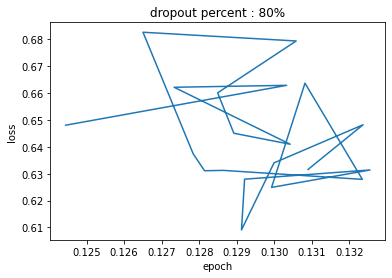

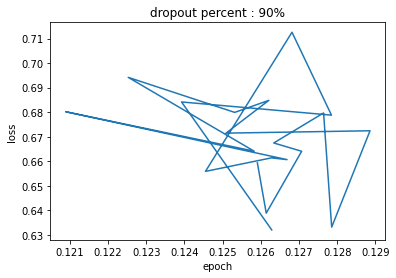

In [31]:
for i in range(1, 9+1):
  model_dropout_setting(i/10)
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
  history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
  fig, ax = plt.subplots()
  ax.set_title('dropout percent : {}%'.format(i*10))
  ax.plot(history.history['loss'], history.history['val_loss'])
  ax.set(xlabel='epoch', ylabel='loss')
  plt.show()

- 드롭아웃 퍼센트에 따른 손실을 측정하려 했지만 그래프가 이상하다....(실패)

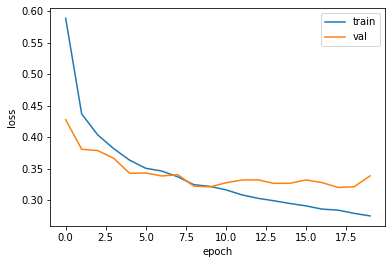

In [15]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [20]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=10, verbose=0, validation_data=(val_scaled, val_target))

In [21]:
model.save_weights('model-weights.h5') # 모델저장

In [23]:
model.save('model-whole.h5') # 모델저장

In [24]:
!ls -al *.h5 # 모델저장한 파일 만들어짐

-rw-r--r-- 1 root root 333448 Feb 13 14:41 model-weights.h5
-rw-r--r-- 1 root root 981360 Feb 13 14:41 model-whole.h5


In [25]:
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')

- 모델을 저장했었던 파라미터와 같아야지 가중치를 불러올 수 있다다

In [28]:
import numpy as np
val_labels = np.argmax(model.predict(val_scaled), axis=-1) # argmax 함수는 배열에서 가장 큰 값의 인덱스를 불러온다 axis=-1은 배열의 마지막 차원을 따라 최댓값을 고름름
print(np.mean(val_labels == val_target)) # val_labels에 val_scaled를 예측한 값을(인덱스)저장 후 답과 같은지 비교를 한다. 그 다음 평균을 내면 정확도가 된다다

375/375 [==============================] - 1s 2ms/step
0.8810833333333333


In [27]:
model = keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3275 - accuracy: 0.8811


[0.3274798095226288, 0.8810833096504211]

## 콜백
- 훈련 중간에 어떤 작업을 수행할 수 있게 해주는 객체
- keras.callbacks 패키지 아래에 있는 클래스임
- ModelCheckpoint 콜백은 에포크마다 모델을 저장
- save_best_only=True 매개변수를 지정하여 가장 낮은 검증 점수를 만드는 모델을 저장할 수 있다.

In [29]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only=True)
model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb])

In [ ]:
model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled, val_target)

In [ ]:
model